In [23]:
from re import search

from matplotlib.pyplot import spring

from aoc import *
from copy import deepcopy
from collections import defaultdict, Counter, deque
import re
from tqdm import tqdm
import itertools
from datetime import datetime

year = datetime.now().year
day = datetime.now().day

if not os.path.exists("inputs"):
    os.mkdir("inputs")

if not os.path.exists(f"inputs/day_{day}_input.txt"):
    download_input(year, day)

aoc, lines, G, R, C = read_input(day, test=False)

lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11


In [24]:
aoc, lines, G, R, C = read_input(day, test=False)

coords = [list(map(int, x.split(","))) for x in lines]

def distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def area(p1, p2):
    L = abs(p2[0] - p1[0]) + 1
    W = abs(p2[1]  - p1[1]) + 1
    return L * W

biggest = 0
for i, coord_i in enumerate(coords):
    for j, coord_j in enumerate(coords):
        if j <= i:
            continue
        this_area = area(coord_i, coord_j)
        #print(coord_i, coord_j, this_area)
        if this_area > biggest:
            biggest = this_area

print(biggest)

lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11
4755429952


Helper function to draw.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from matplotlib.patches import Rectangle

def draw_guess(best):
    reds = [list(map(int, x.split(","))) for x in lines]
    reds = reds + [reds[0]]
    points = np.array(reds)


    # Build segments: shape (N-1, 2, 2) — each is [(x_i, y_i), (x_{i+1}, y_{i+1})]
    segments = np.stack([points[:-1], points[1:]], axis=1)

    # Color values: 0..N-2 (one value per segment)
    values = np.arange(len(segments))

    # Create the collection with a colormap
    lc = LineCollection(
        segments,
        cmap='viridis',          # try 'plasma', 'turbo', 'magma', etc.
        norm=plt.Normalize(values.min(), values.max()),
        linewidths=2
    )
    lc.set_array(values)         # attach the per-segment values for coloring

    fig, ax = plt.subplots()
    ax.add_collection(lc)

    # Plot the points as markers (optional)
    ax.plot(points[:, 0], points[:, 1], 'o', color='black', markersize=4, label='points')



    x1, y1 = best[0]
    x2, y2 = best[1]
    xmin, xmax = min(x1, x2), max(x1, x2)
    ymin, ymax = min(y1, y2), max(y1, y2)
    width  = xmax - xmin
    height = ymax - ymin

    # Add rectangle (outlined, no fill)
    rect = Rectangle((xmin, ymin), width, height,
                     linewidth=2, edgecolor='tab:blue', facecolor='none')
    ax.add_patch(rect)


    # Set sensible limits
    ax.set_xlim(points[:, 0].min()-0.5, points[:, 0].max()+0.5)
    ax.set_ylim(points[:, 1].min()-0.5, points[:, 1].max()+0.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Polyline with color varying by position (index)')
    ax.grid(True)


    plt.rcParams['figure.figsize'] = (30, 20)   # width, height in inches
    plt.rcParams['figure.dpi'] = 120           # crisper output


    # Optional colorbar
    cbar = plt.colorbar(lc, ax=ax, label='segment index')
    plt.legend()
    plt.show()



This method of growing didn't work because I had missed the key requirement that you still need to have red points as the opposite corners.

lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11


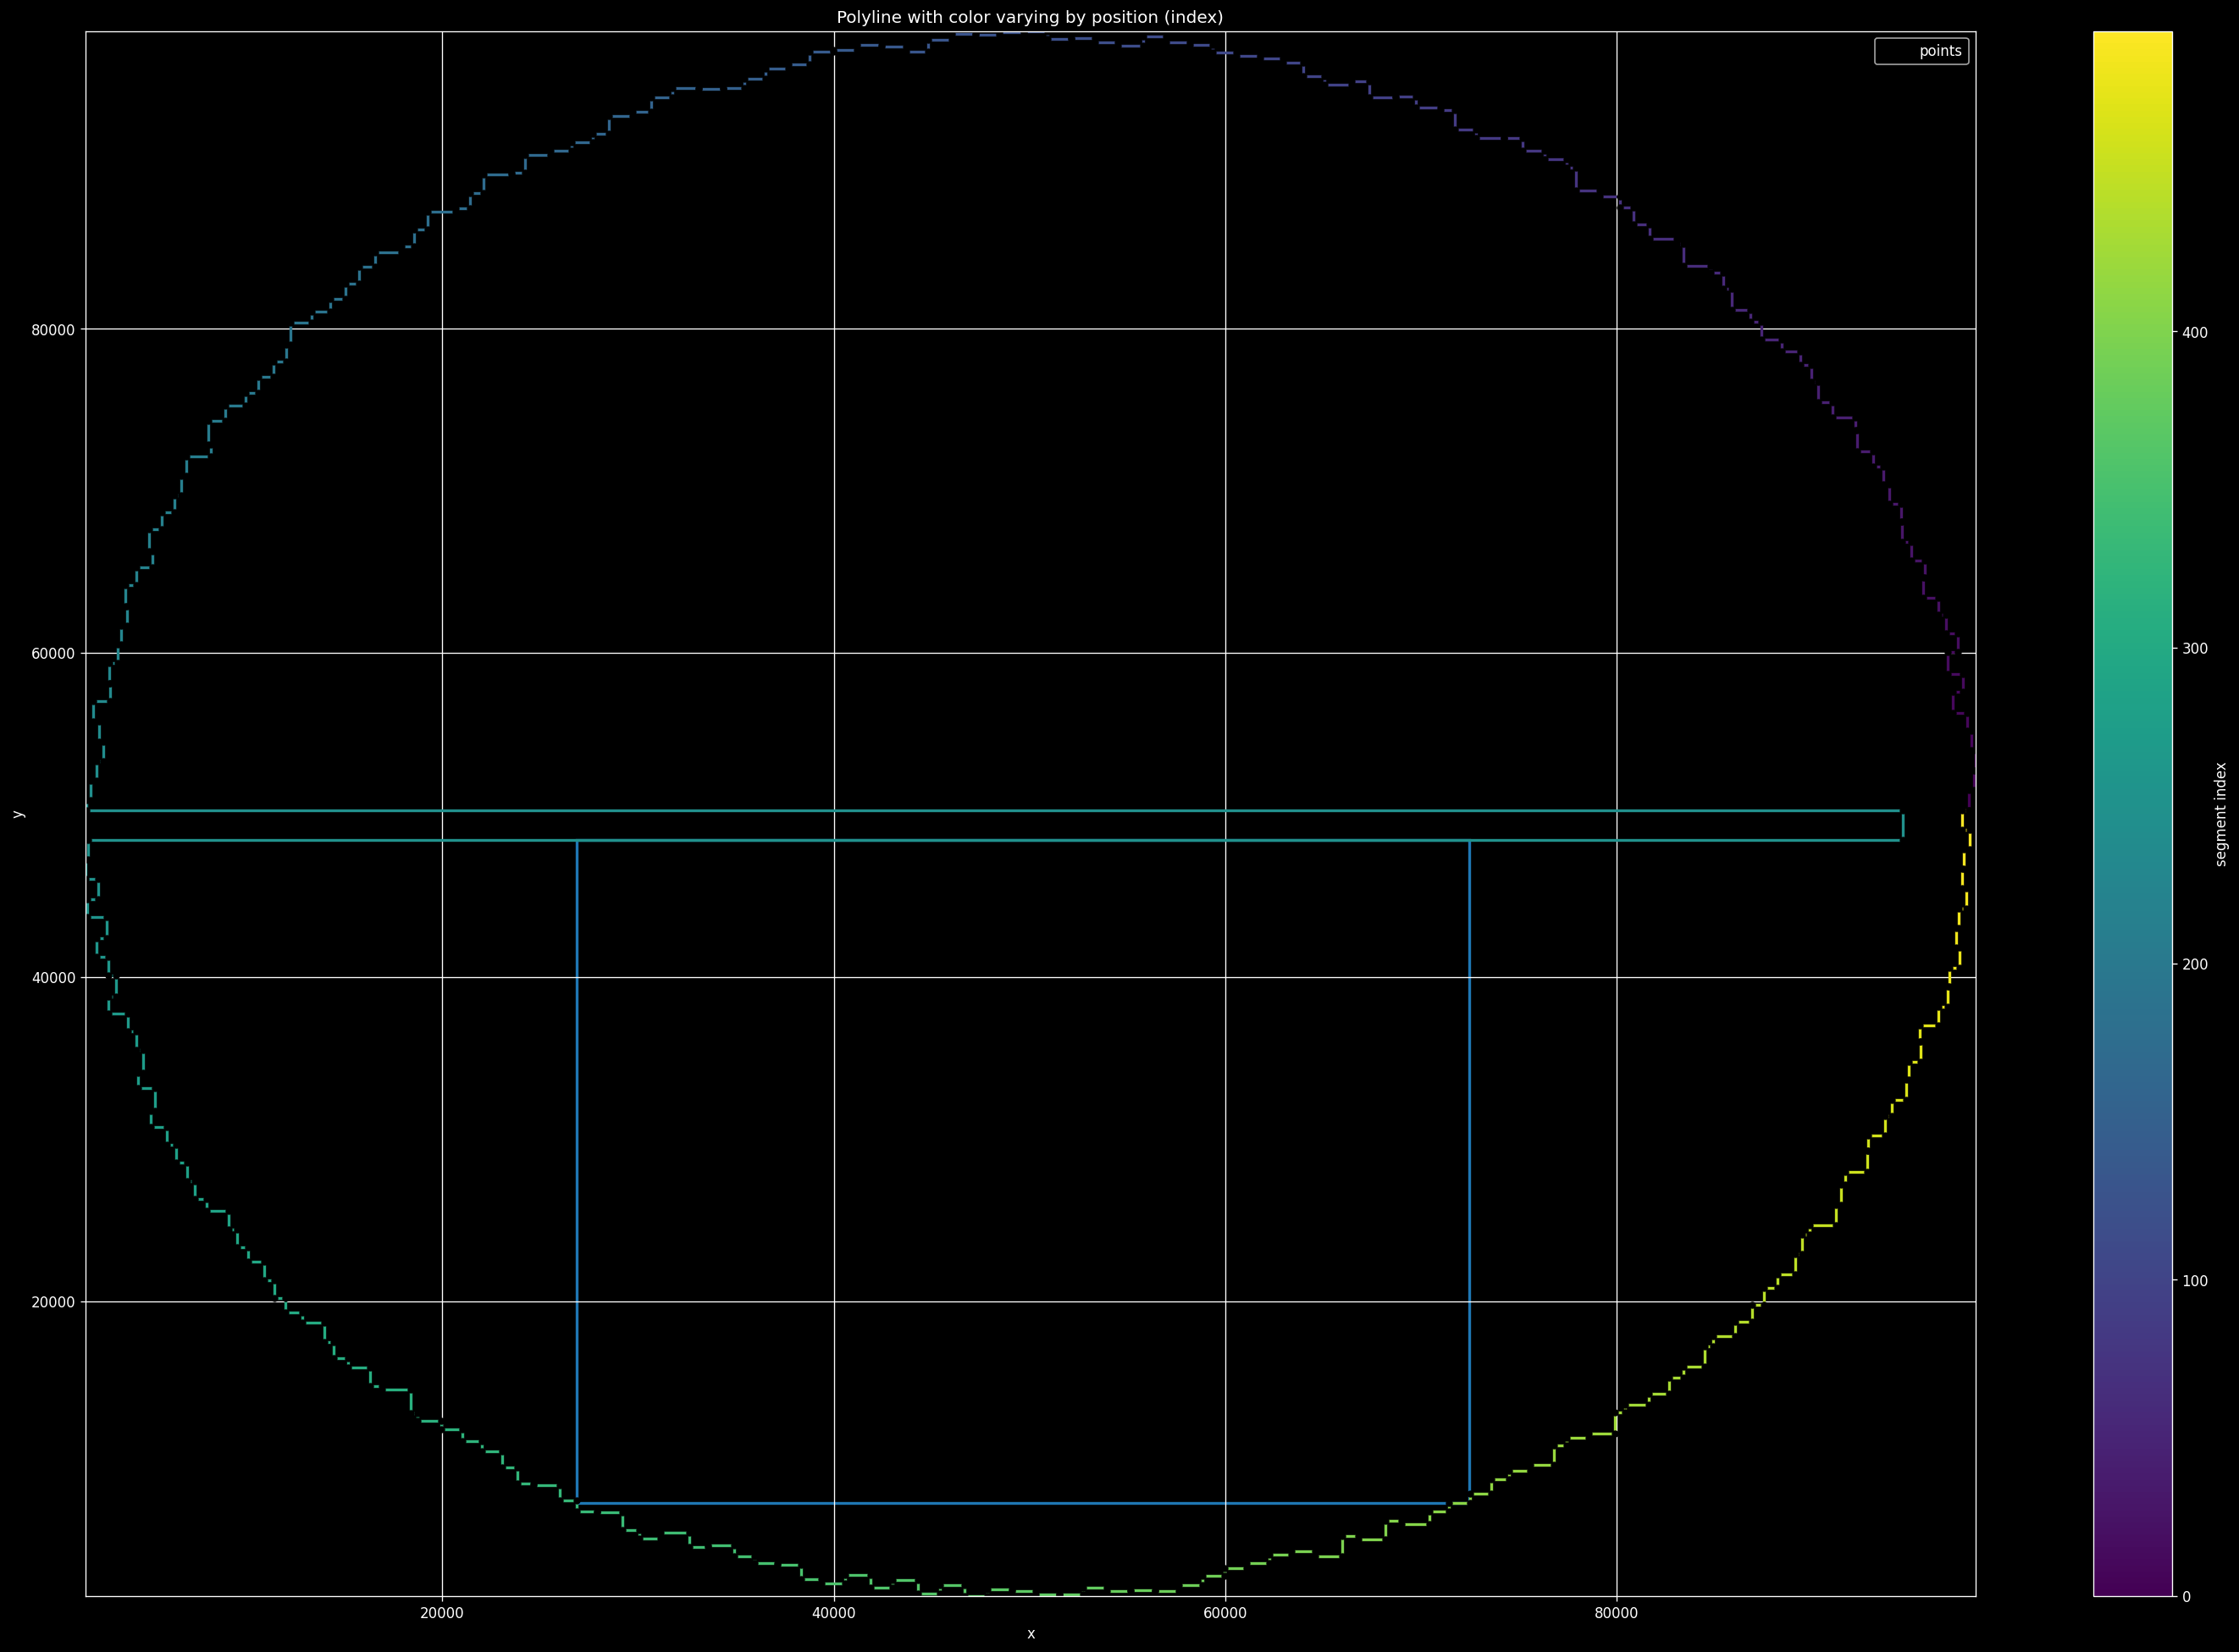

((26863, 48476), (72466, 7535))
1867118968


In [26]:
test = False
aoc, lines, G, R, C = read_input(day, test=test)

reds = [list(map(int, x.split(","))) for x in lines]

pairs = list(zip(reds, reds[1:] + [reds[0]]))


def point_on_any_segment(point, eps=1e-9):
    px, py = point
    for (x1, y1), (x2, y2) in pairs:
        # Cross product for colinearity
        if abs((x2 - x1) * (py - y1) - (y2 - y1) * (px - x1)) < eps:
            # Check bounding box
            if min(x1, x2) - eps <= px <= max(x1, x2) + eps and \
               min(y1, y2) - eps <= py <= max(y1, y2) + eps:
                return True
    return False


if test:
    top = 4
    bottom = 4
    left = 6
    right = 7
else:
    top = 40000
    left = 40000
    bottom = 20000
    right = 60000

growing = {"left":True, "right":True, "up":False, "down":True}

while any(growing.values()):

    if growing["left"]:
        left -= 1
        if point_on_any_segment((left, top)) or point_on_any_segment((left, bottom)):
            growing["left"] = False

    if growing["right"]:
        right+=1
        if point_on_any_segment((right, bottom)) or point_on_any_segment((right, top)):
            growing["right"] = False

    if growing["down"]:
        bottom -=1
        if point_on_any_segment((right, bottom)) or point_on_any_segment((left, bottom)):
            growing["down"] = False


growing["up"] = True

while any(growing.values()):
    if growing["up"]:
        top+=1
        if point_on_any_segment((left, top)) or point_on_any_segment((right, top)):
            growing["up"] = False


draw_guess(((left, top),(right, bottom)))

print(f"{(left, top), (right, bottom)}")
print(area((left, top), (right, bottom)))


# 1867118968 was too high
# The rectangle you choose still must have red tiles in opposite corners, but any other tiles it includes must now be red or green. This significantly limits your options.

# check for 1429596008


This method didn't work because it's easy to go out of bounds on the close side because there was no check for that.

2847938940 ([24246, 90741], (94634, 50282))


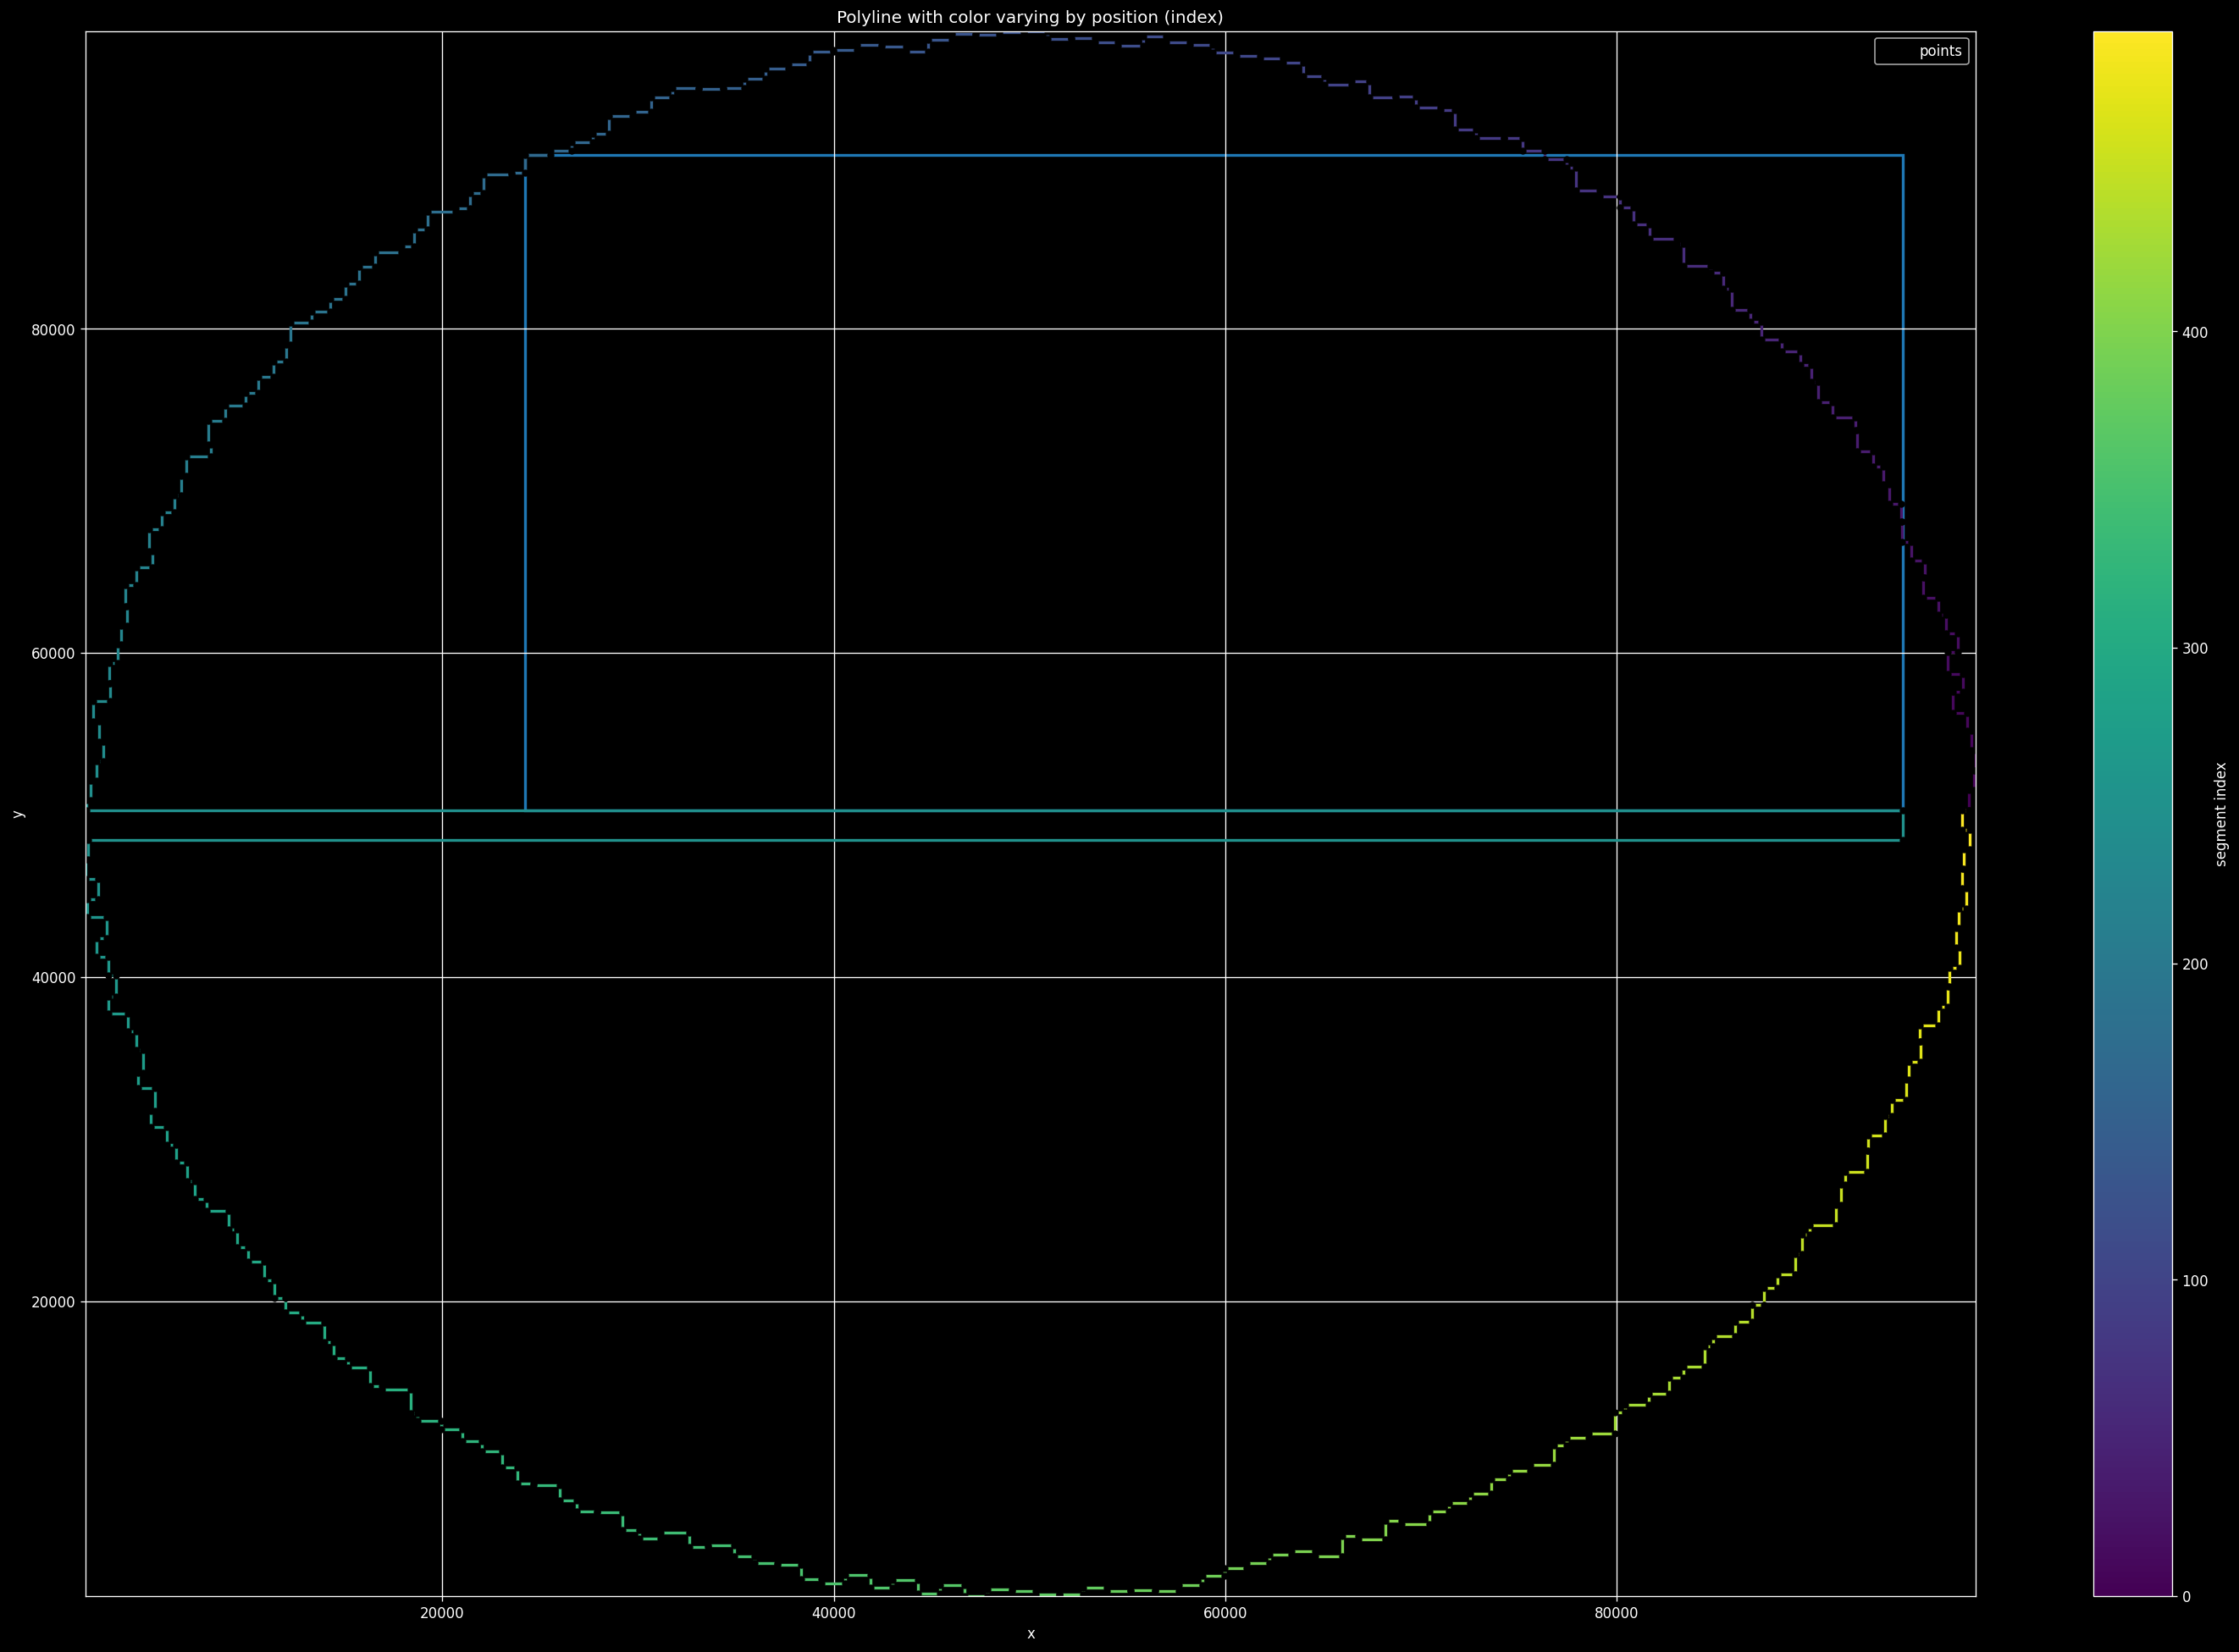

In [27]:
# visually either the bottom right is  94634,50282 or the top right is 94634,48476

bottom = 50282
right = 94634
top = 48476
# grow up and left

biggest = 0
best = None

for p in reds:
    if p[0] < right and p[1] > bottom:
        t = area(p,(right,bottom))
        if t > biggest:
            biggest = t
            best = (p,(right, bottom))

# grow down and left
for p in reds:
    if p[0] < right and p[1] < top:
        t = area(p,(right,top))
        if t > biggest:
            biggest = t
            best = (p,(right, top))

print(biggest,best)

draw_guess(best)

The key intuition turns out to be that if there are any edges **wholly within** your shape, it's invalid.

In [28]:
aoc, lines, G, R, C = read_input(day, test=False)

reds = [list(map(int, x.split(","))) for x in lines]

pairs = list(zip(reds, reds[1:] + [reds[0]]))

greens = set()

for a, b in pairs:
    for i in range(min(a[0], b[0]), max(a[0], b[0]) - 1):
        for j in range(min(a[1], b[1]), max(a[1], b[1]) + 1):
            if (i,j) == a or (i,j) == b:
                continue
            greens.add((i, j))


def no_greens_in_rect(rect_corner1,rect_corner2):

    x_min = min(rect_corner1[0], rect_corner2[0])
    x_max = max(rect_corner1[0], rect_corner2[0])
    y_min = min(rect_corner1[1], rect_corner2[1])
    y_max = max(rect_corner1[1], rect_corner2[1])

    # Check each point
    for x, y in greens:
        if x_min < x < x_max and y_min < y < y_max:
            return False
    return True

biggest = 0
best = None
for i, coord_i in enumerate(coords):
    for j, coord_j in enumerate(coords):
        if j <= i:
            continue
        this_area = area(coord_i, coord_j)
        #print(coord_i, coord_j, this_area)
        if this_area > biggest and no_greens_in_rect(coord_i, coord_j):
            biggest = this_area
            best = (coord_i, coord_j)

print(biggest)

lines[:5]=['97998,50303', '97998,51528', '98246,51528', '98246,52758', '98334,52758']
R=496, C=11
1429596008
